# Trained ResNet-50 classification on os images

Test combinations:

N Samples | ImgAug| Weights | Finetunning | Learning rate | Optimizer | min val loss (< 50 epochs) 
--- | --- | --- | --- | --- | --- | --- | ---  
1500 | 15 deg, 0.005, 0.005 | imagenet | res5b, res5c | 1e-5 | Adam | 0.9 
1500 | 15 deg, 0.005, 0.005 |imagenet | res5b | 1e-5 | Adam | 0.89 
4200 | 45 deg, 0.05, 0.05 |imagenet | res5b | 1e-5 | Adam | 0.74
4200 | 45 deg, 0.05, 0.05 |imagenet | res5b | 1e-4 | Adam | 0.8818
4200 | 45 deg, 0.05, 0.05 |imagenet | res5b | 1e-5 | Adam | -

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
from datetime import datetime
import numpy as np

In [3]:
# Project
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname('.')), '..', 'common'))

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

def plt_st(n, m):
    plt.figure(figsize=(n, m))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
from resnet_keras122 import get_resnet_original

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GT 750M (CNMeM is enabled with initial size: 50.0% of memory, cuDNN 5110)


In [6]:
from training_utils import get_trainval_id_type_lists3

print("\n {} - Get train/val lists ...".format(datetime.now()))
train_id_type_list, val_id_type_list = get_trainval_id_type_lists3(n_images_per_class=1400)
print len(train_id_type_list), len(val_id_type_list)


 2017-04-25 22:12:15.116957 - Get train/val lists ...
2937 1263


In [7]:
print("\n {} - Get ResNet-50 model ...".format(datetime.now()))
resnet = get_resnet_original(opt='adam', lr=1e-5, trained=True, finetunning=True)


 2017-04-25 22:12:15.140501 - Get ResNet-50 model ...


In [8]:
resnet.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 224, 224)   0                                            
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 230, 230)   0           input_1[0][0]                    
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 64, 112, 112)  9472        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 64, 112, 112)  256         conv1[0][0]                      
___________________________________________________________________________________________

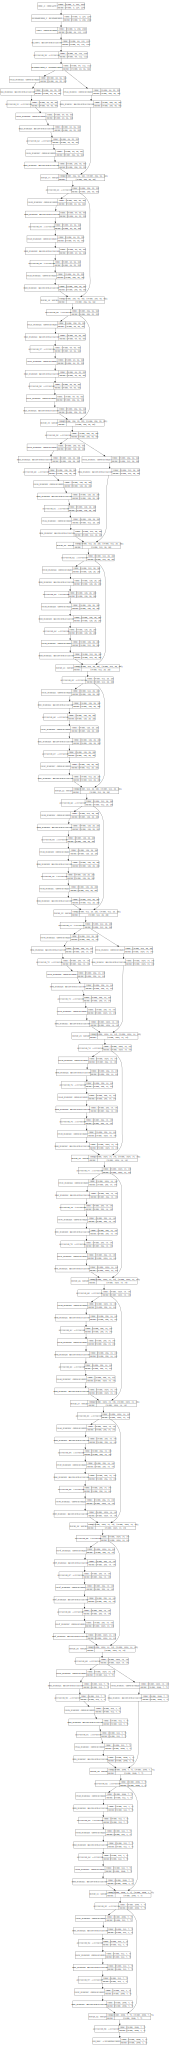

In [17]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

graph = model_to_dot(resnet, True, True)
SVG(graph.create(prog='dot', format='svg'))

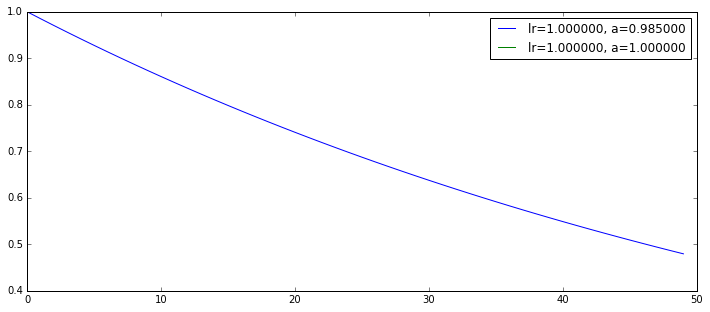

In [10]:
from training_utils import exp_decay

lr_1 = 1.0; a_1 = 0.985
lr_2 = 1.0; a_2 = 1.0

epochs = np.arange(0, 50)
lrs_1 = exp_decay(epochs, lr=lr_1, a=a_1)
lrs_2 = exp_decay(epochs, lr=lr_2, a=a_2)
plt_st(12, 5)
plt.plot(epochs, lrs_1, label="lr=%f, a=%f" % (lr_1, a_1))
plt.plot(epochs, lrs_2, label="lr=%f, a=%f" % (lr_2, a_2))
plt.legend()

In [8]:
seed = 2017
np.random.seed(seed)
save_prefix='resnet50_trained_finetunning_cervix_adam_seed=%i' % seed

In [9]:
from glob import glob
from training_utils import find_best_weights_file

weights_files = glob("weights/%s*.h5" % save_prefix)
# weights_files = glob("weights/resnet50_trained_finetunning_cervix_adam_seed=2017_06-0.9762.h5")
best_weights_filename, best_val_loss = find_best_weights_file(weights_files)
print("Best val loss weights: ", best_weights_filename)

if len(best_weights_filename) > 0:
    # load weights to the model
    print("Load found weights: ", best_weights_filename)
    resnet.load_weights(best_weights_filename)

('Best val loss weights: ', 'weights/resnet50_trained_finetunning_cervix_adam_seed=2017_06-0.9762.h5')
('Load found weights: ', 'weights/resnet50_trained_finetunning_cervix_adam_seed=2017_06-0.9762.h5')


In [14]:
from xy_providers import DataCache
# cache = DataCache(0)

In [ ]:
if True:
    from training_utils import classification_train as train
      
    nb_epochs = 50
    batch_size = 10
    
    lrate_decay_f = lambda epoch: exp_decay(epoch, lr=lr_1, a=a_1) 

    print("\n {} - Start training ...".format(datetime.now()))
    h = train(resnet, 
              train_id_type_list, 
              val_id_type_list, 
              option='cervix',
              normalization='resnet',
              nb_epochs=nb_epochs,
              samples_per_epoch=1.23 * len(train_id_type_list),
              nb_val_samples=len(val_id_type_list),
              lrate_decay_f=None, #lrate_decay_f,
              batch_size=batch_size, 
              xy_provider_cache=cache,
              seed=seed,
              save_prefix=save_prefix)


 2017-04-25 22:12:37.591722 - Start training ...

-- Training parameters: 10, 50, 3620, 1270
('Image normalization: ', 'resnet')

-- Fit model
Epoch 1/50
3620/3620 [==============================] - 1149s - loss: 0.8386 - acc: 0.6262 - val_loss: 0.9517 - val_acc: 0.5425
Epoch 2/50
3620/3620 [==============================] - 310s - loss: 0.8242 - acc: 0.6329 - val_loss: 0.9615 - val_acc: 0.5417
Epoch 3/50
3620/3620 [==============================] - 306s - loss: 0.8135 - acc: 0.6445 - val_loss: 0.9243 - val_acc: 0.5819
Epoch 4/50
3620/3620 [==============================] - 319s - loss: 0.7995 - acc: 0.6467 - val_loss: 0.9415 - val_acc: 0.5606
Epoch 5/50
3620/3620 [==============================] - 318s - loss: 0.7854 - acc: 0.6530 - val_loss: 0.9398 - val_acc: 0.5480
Epoch 6/50
3620/3620 [==============================] - 312s - loss: 0.7620 - acc: 0.6740 - val_loss: 0.9212 - val_acc: 0.5740
Epoch 7/50
 910/3620 [======>.......................] - ETA: 171s - loss: 0.7702 - acc: 0.654

In [27]:
#resnet.save_weights("weights/resnet50_trained_finetunning_cervix_adam_seed=2017_06-0.9762.h5")

In [ ]:
from training_utils import classification_validate as validate
from test_utils import classification_predict as predict

batch_size = 4

In [ ]:
print("\n {} - Start validation ...".format(datetime.now()))
validate(resnet, val_id_type_list, batch_size=batch_size, xy_provider_cache=cache)

In [44]:
print("\n {} - Start predictions and write submission ...".format(datetime.now()))
from test_utils import get_test_id_type_list
test_id_type_list = get_test_id_type_list()
os_test_id_type_list = [(id_type[0], id_type[1] + '_os') for id_type in test_id_type_list]
predict(resnet, os_test_id_type_list, info=save_prefix, batch_size=batch_size)


 2017-03-20 13:46:08.072525 - Start predictions and write submission ...
('--', 0)
('--', 8)
('--', 16)
('--', 24)
('--', 32)
('--', 40)
('--', 48)
('--', 56)
('--', 64)
('--', 72)
('--', 80)
('--', 88)
('--', 96)
('--', 104)
('--', 112)
('--', 120)
('--', 128)
('--', 136)
('--', 144)
('--', 152)
('--', 160)
('--', 168)
('--', 176)
('--', 184)
('--', 192)
('--', 200)
('--', 208)
('--', 216)
('--', 224)
('--', 232)
('--', 240)
('--', 248)
('--', 256)
('--', 264)
('--', 272)
('--', 280)
('--', 288)
('--', 296)
('--', 304)
('--', 312)
('--', 320)
('--', 328)
('--', 336)
('--', 344)
('--', 352)
('--', 360)
('--', 368)
('--', 376)
('--', 384)
('--', 392)
('--', 400)
('--', 408)
('--', 416)
('--', 424)
('--', 432)
('--', 440)
('--', 448)
('--', 456)
('--', 464)
('--', 472)
('--', 480)
('--', 488)
('--', 496)
('--', 504)
     513
